# Overview

Understanding customer churn directly impacts business growth and costs. A model that can predict customers who are more likely to leave or stay with a bank is a valuable tool to have. This project uses a kaggle [dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers) to build a machine learning model and deploy a web app that can classify if a customer is more likely to stay or leave with a bank.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(font_scale=1)

In [2]:
path = '../data/bank_churn.csv'
df = pd.read_csv(path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
drop_cols = [
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'CLIENTNUM'
]

df.drop(columns=drop_cols, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Data Visualization

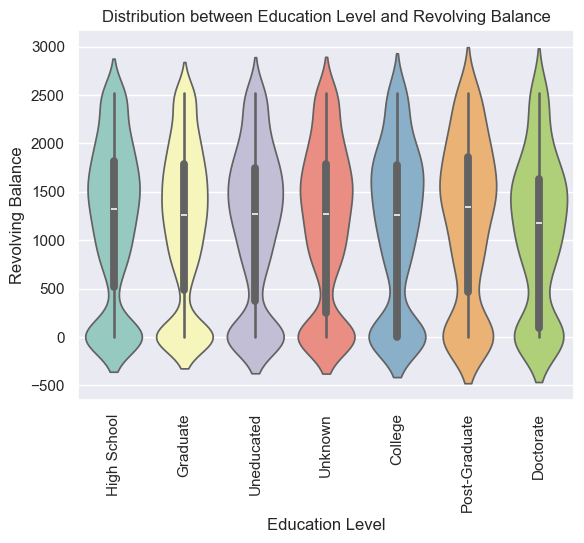

In [5]:
sns.violinplot(
    data=df,
    x='education_level',
    y='total_revolving_bal',
    palette='Set3')
plt.xlabel('Education Level')
plt.ylabel('Revolving Balance')
plt.xticks(rotation=90)
plt.title('Distribution between Education Level and Revolving Balance');

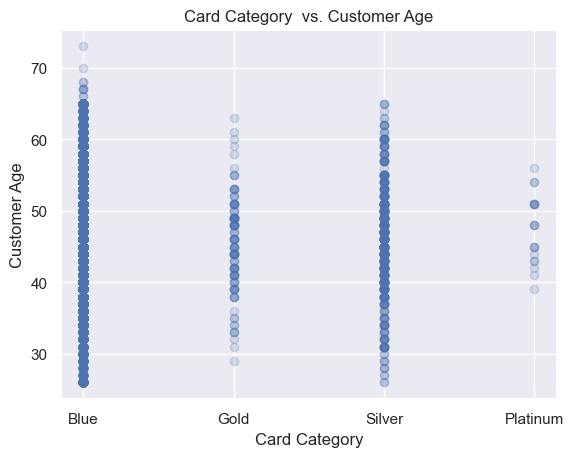

In [6]:
plt.scatter(
    x=df['card_category'],
    y=df['customer_age'],
    alpha=0.2)
plt.title('Card Category  vs. Customer Age')
plt.xlabel('Card Category')
plt.ylabel('Customer Age')
plt.show()

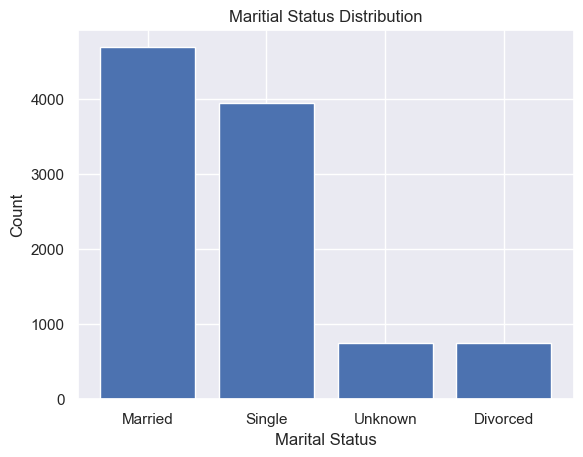

In [7]:
plt.bar (
    df['marital_status'].unique(),
    df['marital_status'].value_counts()
)
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.title('Maritial Status Distribution');

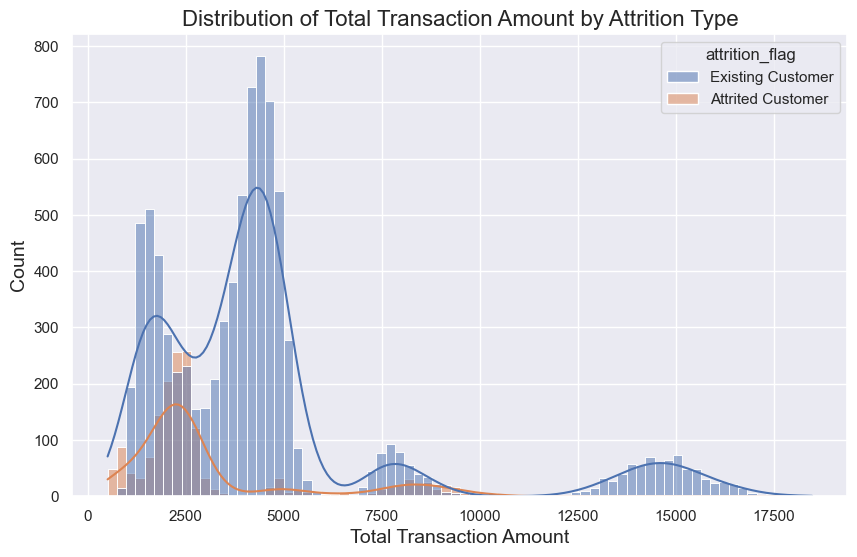

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_trans_amt', hue='attrition_flag', kde=True)
plt.title('Distribution of Total Transaction Amount by Attrition Type', fontsize=16)
plt.xlabel('Total Transaction Amount', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

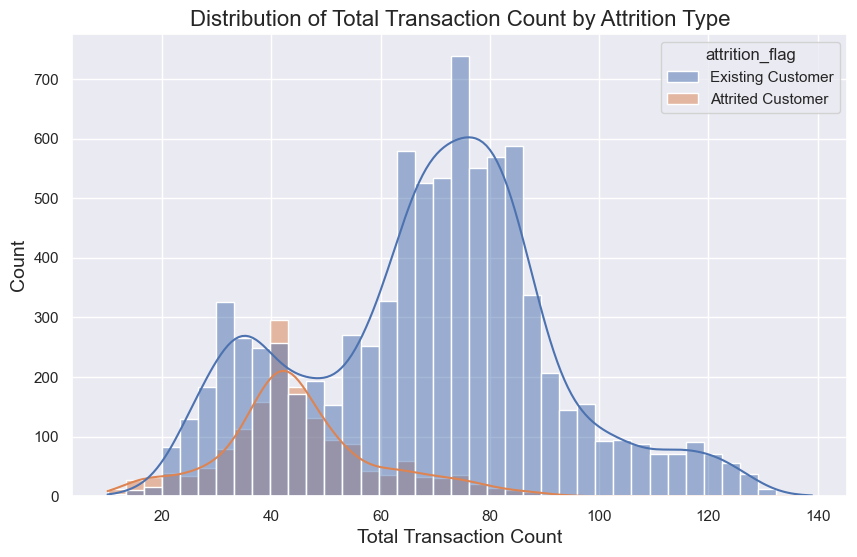

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_trans_ct', hue='attrition_flag', kde=True)
plt.title('Distribution of Total Transaction Count by Attrition Type', fontsize=16)
plt.xlabel('Total Transaction Count', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

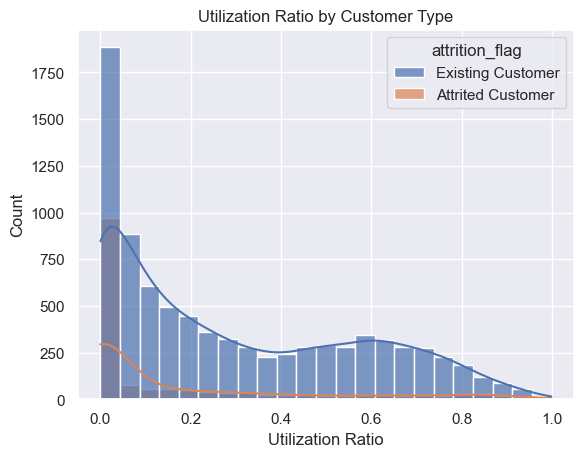

In [10]:
sns.histplot(
    data=df,
    x='avg_utilization_ratio',
    hue='attrition_flag',
    alpha=0.7,
    kde=True
)
plt.title('Utilization Ratio by Customer Type')
plt.xlabel('Utilization Ratio')
plt.show()

# Machine Learning

## Encode Categorical Variables

In [11]:
df['attrition_flag'] = pd.get_dummies(data=df['attrition_flag'], dtype=int, drop_first=True)

In [12]:
drop_cols = [
    'gender', 'education_level', 'marital_status', 'income_category', 'card_category', 'months_inactive_12_mon',
    'contacts_count_12_mon', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1',
    'dependent_count'
    ]
df.drop(columns=drop_cols, inplace=True)
df.head()

,attrition_flag,customer_age,months_on_book,total_relationship_count,credit_limit,total_revolving_bal,total_trans_ct,avg_utilization_ratio
0,1,45,39,5,12691.0,777,42,0.061
1,1,49,44,6,8256.0,864,33,0.105
2,1,51,36,4,3418.0,0,20,0.000
3,1,40,34,3,3313.0,2517,20,0.760
4,1,40,21,5,4716.0,0,28,0.000


## Train Models

In [13]:
X = df.drop(columns='attrition_flag')
y = df['attrition_flag']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

In [14]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [15]:
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
lr_preds = lr.predict(x_test)
dt_preds = dt.predict(x_test)
rf_preds = rf.predict(x_test)

lr_score = accuracy_score(y_true=y_test, y_pred=lr_preds)
dt_score = accuracy_score(y_true=y_test, y_pred=dt_preds)
rf_score = accuracy_score(y_true=y_test, y_pred=rf_preds)

print('ML Model Accuracy Scores')
print('-'*50)
print(f'Logistic Regression: {round(lr_score, 3)}')
print(f'Decision Tree: {round(dt_score, 3)}')
print(f'Random Forest: {round(rf_score, 3)}')

ML Model Accuracy Scores
--------------------------------------------------
Logistic Regression: 0.86
Decision Tree: 0.869
Random Forest: 0.906


# Model Optimization

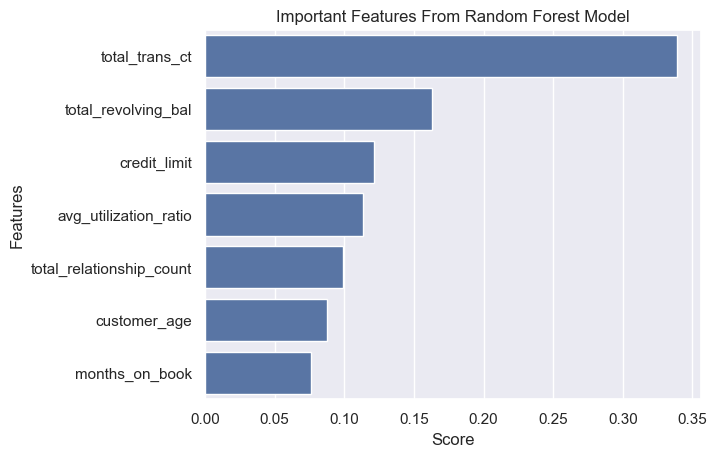

In [19]:
important_features = rf.feature_importances_

features_to_use = {}
for i in range(len(X.columns)):
    features_to_use[X.columns[i]] = important_features[i]

important_features = sorted(features_to_use.items(), key=lambda x:x[1], reverse=True)
important_features = pd.DataFrame(important_features, columns=['feature', 'score'])

plt.title('Important Features From Random Forest Model')
sns.barplot(data=important_features, x='score', y='feature')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

In [20]:
df.head()

,attrition_flag,customer_age,months_on_book,total_relationship_count,credit_limit,total_revolving_bal,total_trans_ct,avg_utilization_ratio
0,1,45,39,5,12691.0,777,42,0.061
1,1,49,44,6,8256.0,864,33,0.105
2,1,51,36,4,3418.0,0,20,0.000
3,1,40,34,3,3313.0,2517,20,0.760
4,1,40,21,5,4716.0,0,28,0.000


In [21]:
X.columns

Index(['customer_age', 'months_on_book', 'total_relationship_count',
       'credit_limit', 'total_revolving_bal', 'total_trans_ct',
       'avg_utilization_ratio'],
      dtype='object')

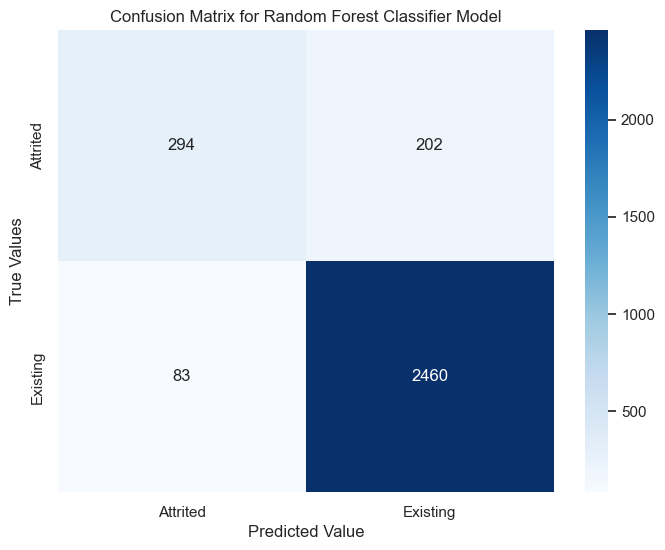

In [22]:
plt.figure(figsize=(8, 6))

matrix = confusion_matrix(y_test, rf_preds)

plt.title('Confusion Matrix for Random Forest Classifier Model')
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

new_labels = ['Attrited', 'Existing']
class_labels = [0.5, 1.5]
plt.xticks(class_labels, new_labels)
plt.yticks(class_labels, new_labels)
plt.ylabel('True Values')
plt.xlabel('Predicted Value')
plt.show()

In [23]:
report = classification_report(y_true=y_test, y_pred=rf_preds)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       496
           1       0.92      0.97      0.95      2543

    accuracy                           0.91      3039
   macro avg       0.85      0.78      0.81      3039
weighted avg       0.90      0.91      0.90      3039



# Save The Model

In [24]:
dump(rf, 'model.joblib')

['model.joblib']